# Drug Consumption Risk Project

In [198]:
# import moduls for data processing and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
#import data
# data contains an ID column which will be used as Index colum as it is numerical and does not seem to provide 
#any further information
data = pd.read_excel('drug_consumption.xls', sheet_name = 'drug_consumption', header = 0, index_col = 'ID')

In [29]:
data.head(10)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Information provided at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
  
Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

What do the different categories mean:  
CL0: never used.   
CL1: Used over a decade ago.   
CL2: Used in last decade.   
CL3: Used in last year.    
CL4: used in last month.   
CL5: used in last week.    
CL6: used in last day.  

## Personality traits

Five different factors are used to describe the Personality. This system is called the [OCEAN model](https://en.wikipedia.org/wiki/Big_Five_personality_traits) and was introduced in the eraly 1980s and has been developed since.  
The 5 traits are:   
    * NScore: neuroticism (sensitive/nervous vs. resilient/confident)  
    * Escore: extraversion (outgoing/energetic vs. solitary/reserved)  
    * Oscore: openeness to experience (inventive/curious vs. consistent/cautious)  
    * Ascore: agreeableness (friendly/compassionate vs. challenging/callous)  
    * Cscore: conscientiousness (efficient/organized cv extravagant/careless)  
    
Furthermore scores for "Impulsiveness" and "sensation seeing" are provided:  
    * Impulsivness based on [BIS-11 system](http://www.impulsivity.org/measurement/bis11)  
    * sensation seeing based on [IMPSS]  (https://grupsderecerca.uab.cat/zkpq/sites/grupsderecerca.uab.cat.zkpq/files/zkpq7.pdf)  


## Check for Missing values

In [94]:
data.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

There are now missing values in the dataset.

### Check if information provided at UCI is coorect

In [30]:
print(data.shape)
data.dtypes

(1885, 31)


Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [50]:
# get number of colums with different types type
object_shape = data.select_dtypes(include = ['object']).shape
num_shape = data.select_dtypes(include = ['int64', 'float64']).shape
print(f'There are {object_shape[1]} features of type "object"')
print(f'There are {num_shape[1]} features of type "int64" or "float64"')

There are 19 features of type "object"
There are 12 features of type "int64" or "float64"


This is in line with the description of the dataset. Note that the numerical features like 'Gender' and all personality trait scores are still categorial values that have been transformed using T-statistics t = (sample mean - population mean)/(st_dev sample/sqrt(number of samples)).  


In [26]:
#get the number of different values in categorial colums

for col in data.select_dtypes(include = ['object']).columns:
    print(f' Number of unique values for {col:10}: {data[col].nunique()}')
    

 Number of unique values for Alcohol   : 7
 Number of unique values for Amphet    : 7
 Number of unique values for Amyl      : 7
 Number of unique values for Benzos    : 7
 Number of unique values for Caff      : 7
 Number of unique values for Cannabis  : 7
 Number of unique values for Choc      : 7
 Number of unique values for Coke      : 7
 Number of unique values for Crack     : 7
 Number of unique values for Ecstasy   : 7
 Number of unique values for Heroin    : 7
 Number of unique values for Ketamine  : 7
 Number of unique values for Legalh    : 7
 Number of unique values for LSD       : 7
 Number of unique values for Meth      : 7
 Number of unique values for Shrooms   : 7
 Number of unique values for Nicotine  : 7
 Number of unique values for Semer     : 5
 Number of unique values for VSA       : 7


In [242]:
# what are the Semeron values and how many people calim to have used it?
data['Semer'].value_counts(normalize = False).sort_index()

CL0    1877
CL1       2
CL2       3
CL3       2
CL4       1
Name: Semer, dtype: int64

Less than 0.5 % of the responders claim to have used the fictious drug Semeron and can thus be expected to be over-claimers. Should we delete those instances?

## Is the data set biased?

### Gender

In [225]:
data['Gender'].unique()
data_mod = data.copy()
data_mod.replace({'Gender':{data['Gender'].unique()[0]:'female',data['Gender'].unique()[1]:'male'}}, inplace = True)

data_mod.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,female,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0


In [226]:
px.pie(data_mod, names = 'Gender')

Data set contains balanced gender data.

How does the sex affect the drug consumption risk?

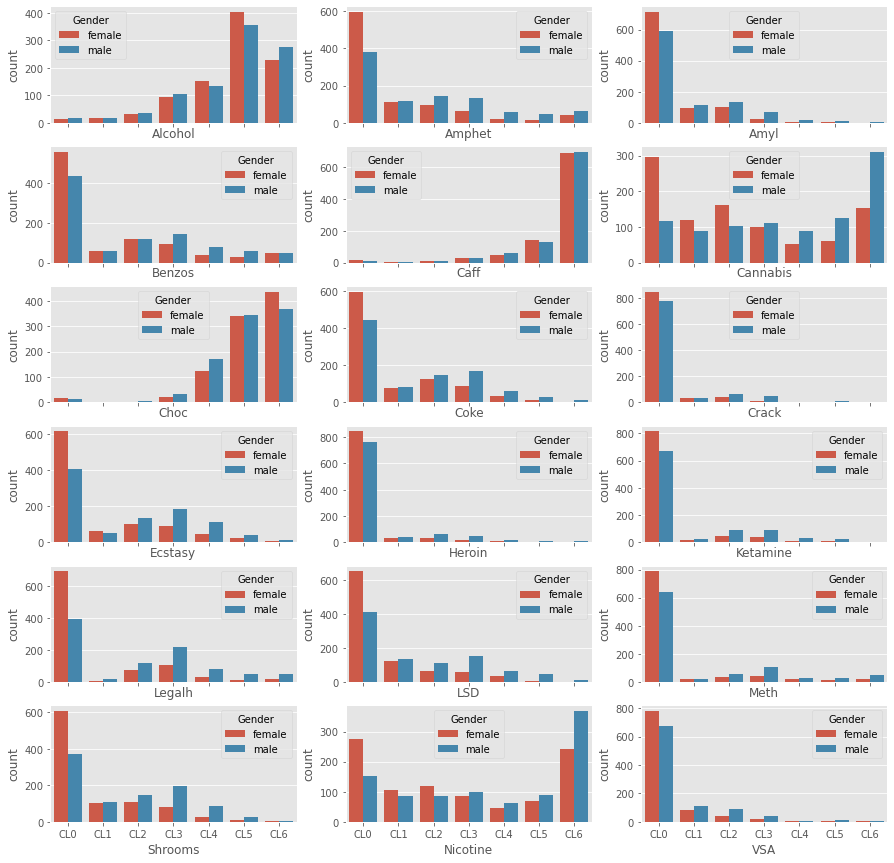

In [227]:
#get a list with name of drugs
drugs = [name for name in data.select_dtypes(include = ['object']).columns if name not in ['Semer']]
#order categories
order = data_mod.Alcohol.value_counts().sort_index()

fig, axs = plt.subplots(6,3, sharex= True)
fig.set_figheight(15)
fig.set_figwidth(15)
j = 0
for i, drug in enumerate(drugs):
    if i % 3 == 0:
        j = 0
    sns.countplot(data = data_mod, x = drug, hue = 'Gender', order = order.index, ax = axs[i//3, j] )
    j += 1


Most drugs have more often not been used by females than by men (category CL0) and more men have used drugs recently (CL6).  

### Age

In [228]:
data['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

In [229]:
data_mod.replace({'Age':{data['Age'].unique()[0]:'35-44',data['Age'].unique()[1]:'25-34',
                 data['Age'].unique()[2]: '18-24', data['Age'].unique()[3]:'65+',
                 data['Age'].unique()[4]: '45-54', data['Age'].unique()[5]:'55-64'}}, inplace = True)

In [230]:
px.pie(data_mod, names = 'Age')

The data has a clear bias for younger uses.

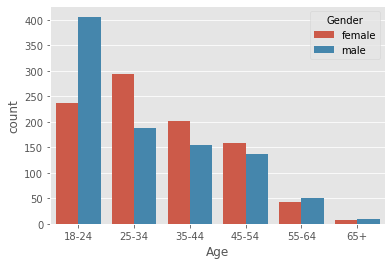

In [231]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(x = 'Age', hue = 'Gender', data = data_mod, order = age_order);

Espacially amongst the youngest responders, the age of responders is uneven/skewed between the two genders.  

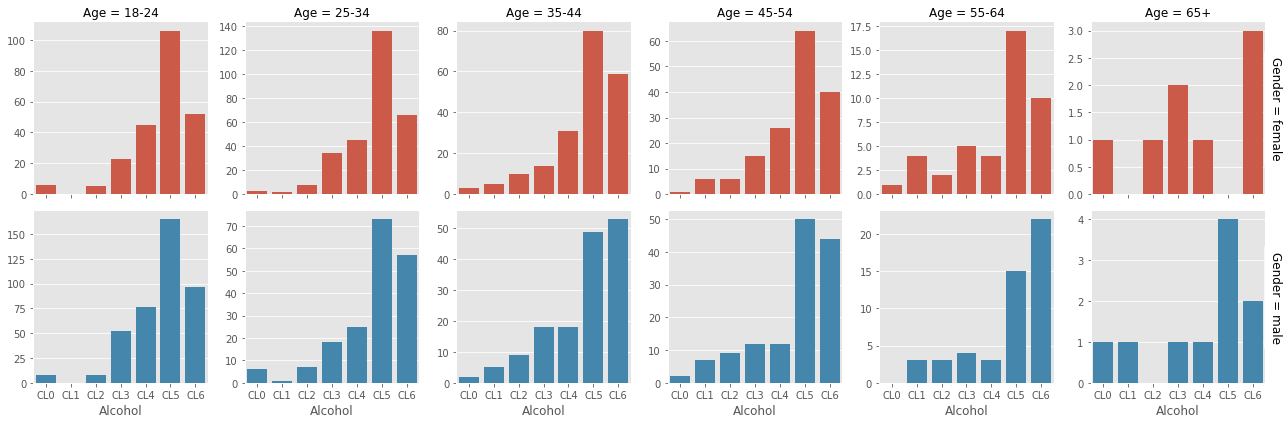

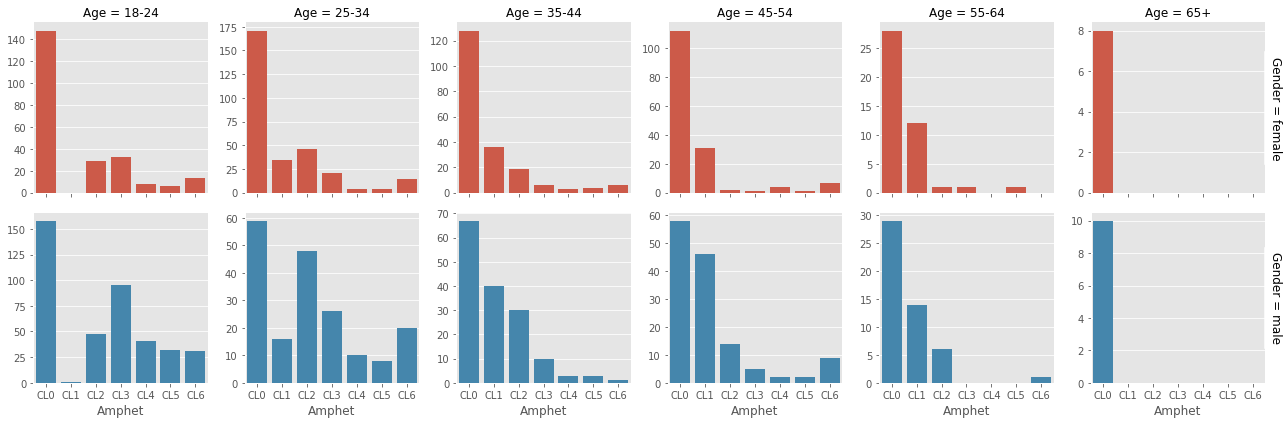

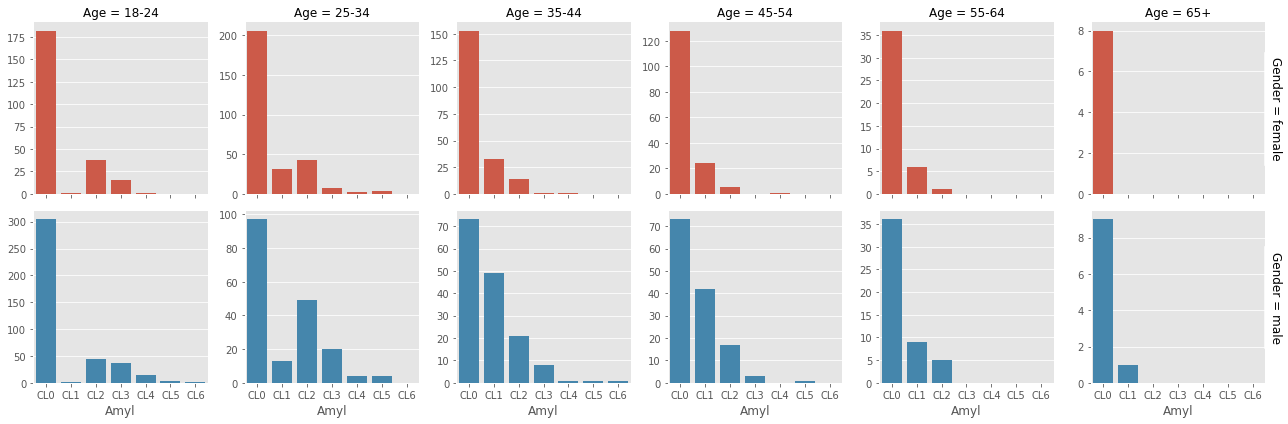

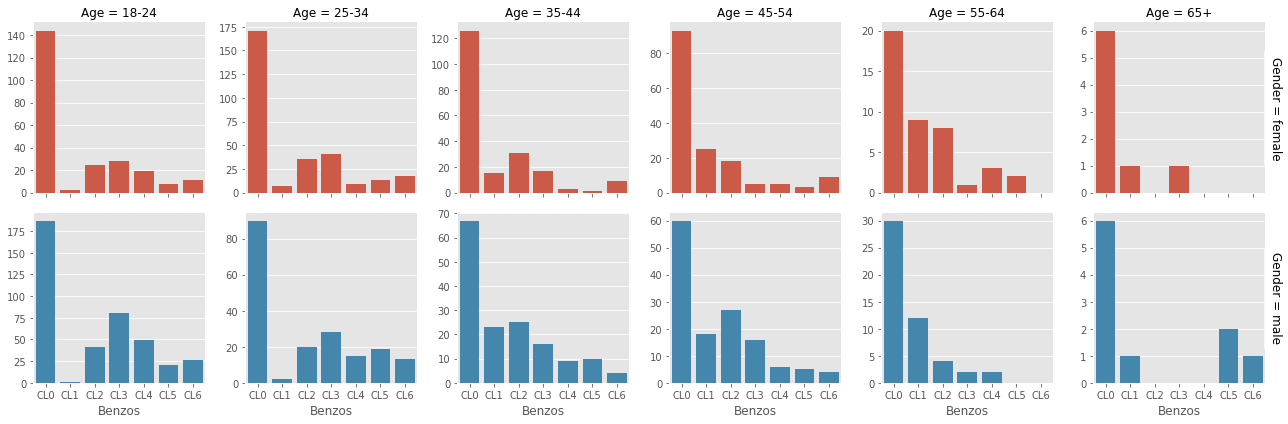

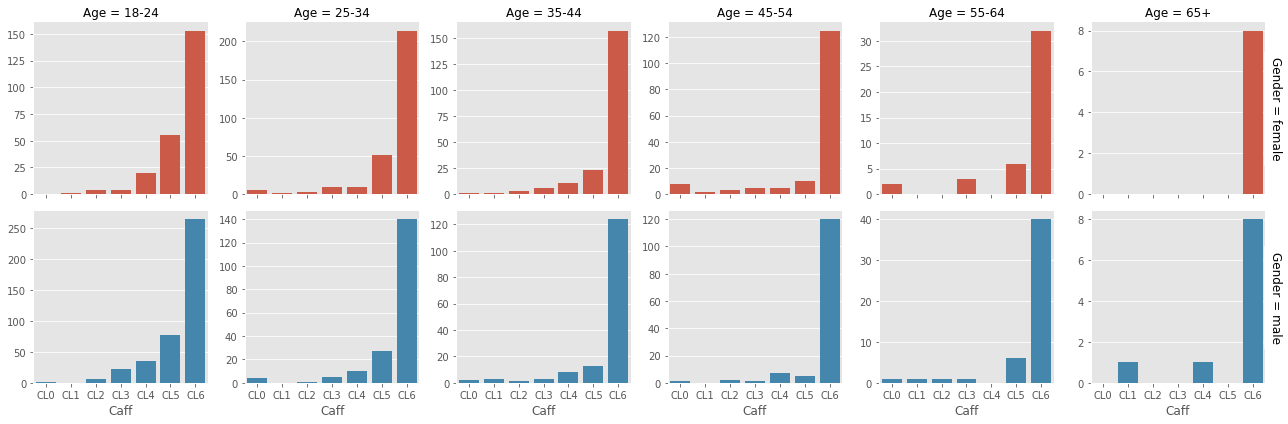

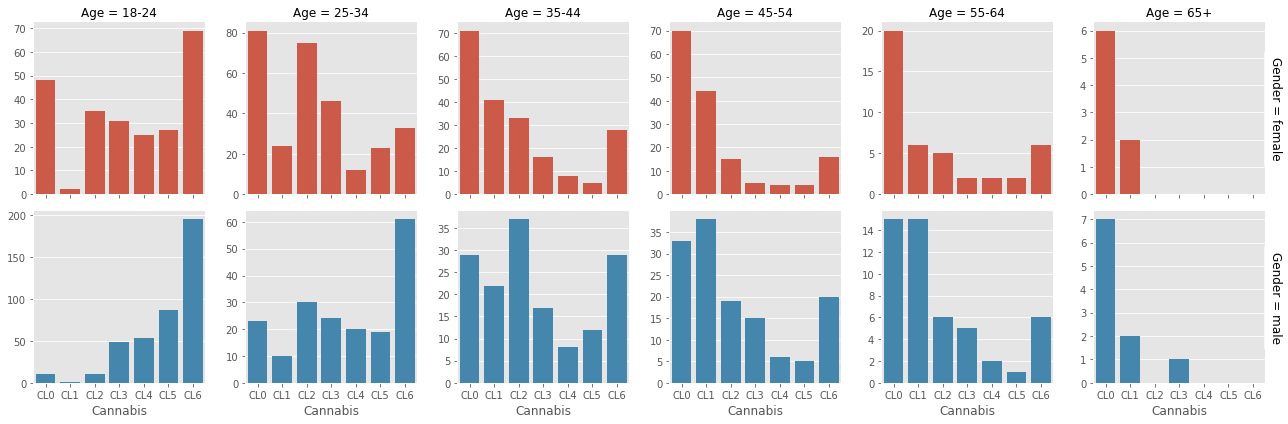

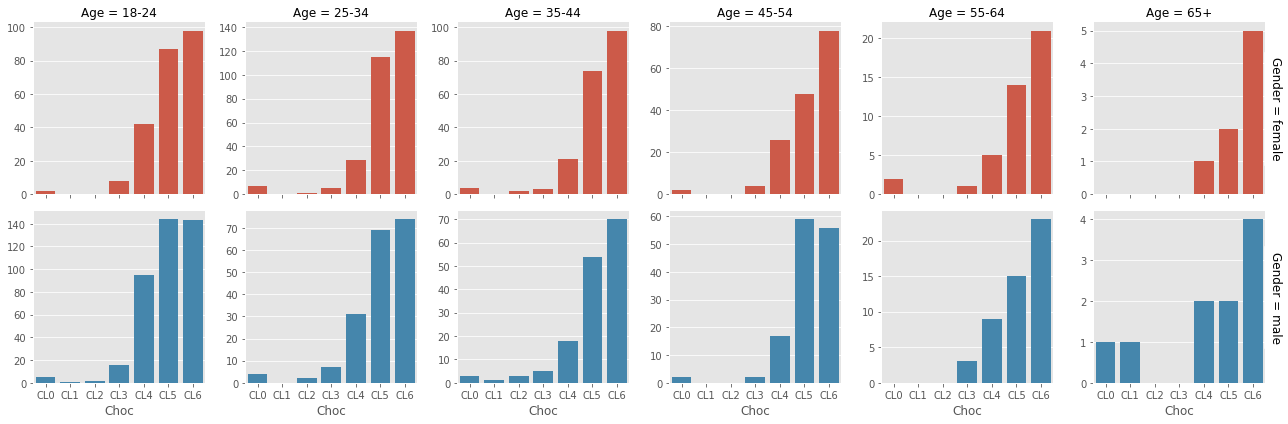

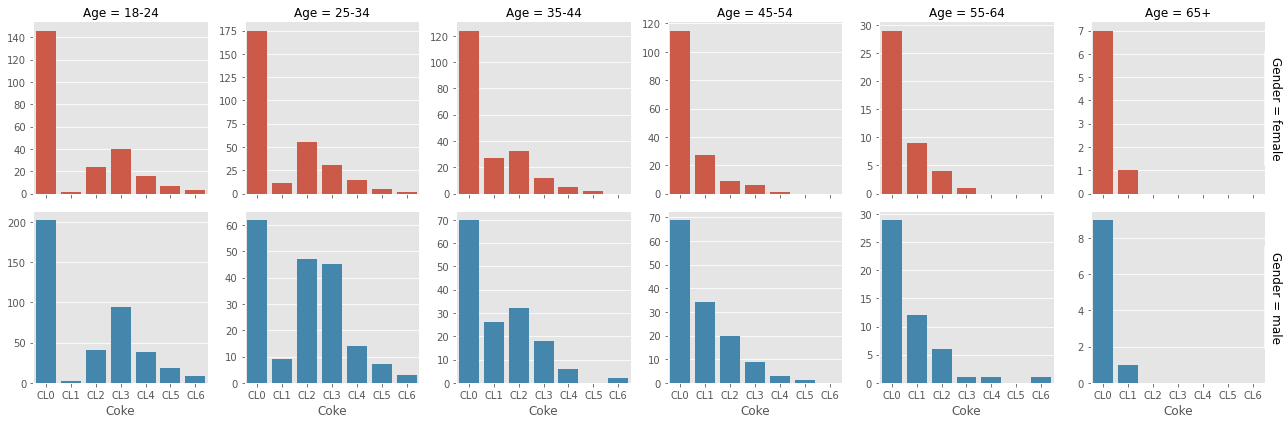

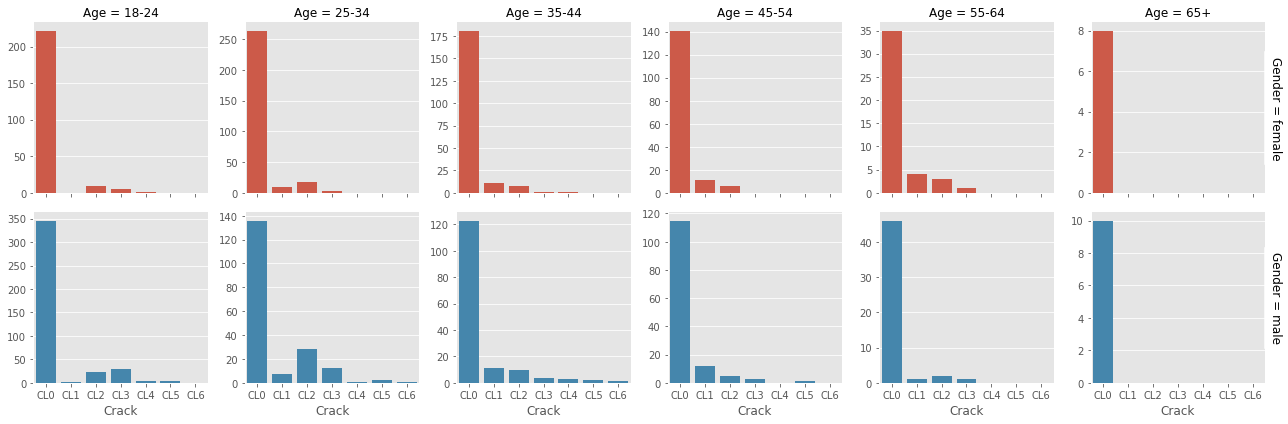

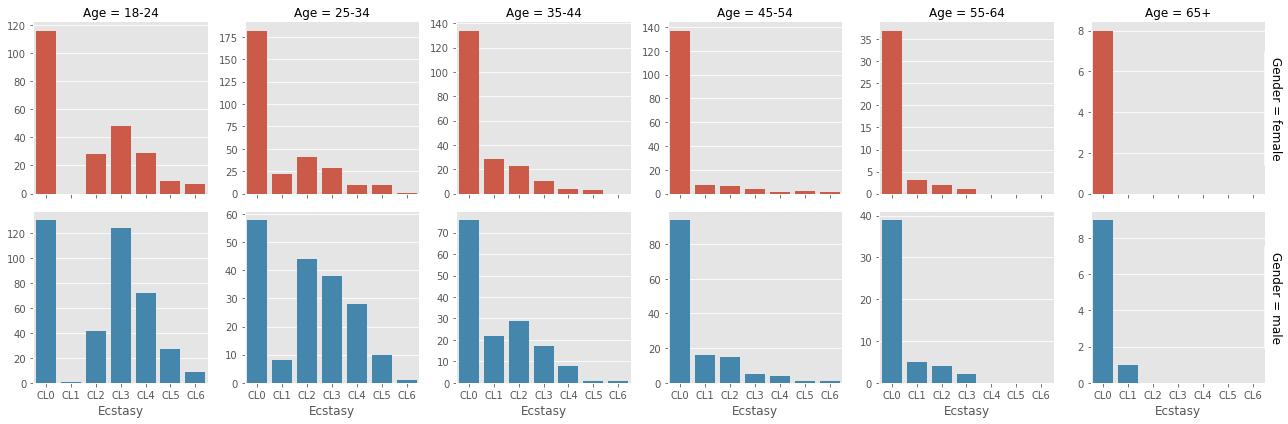

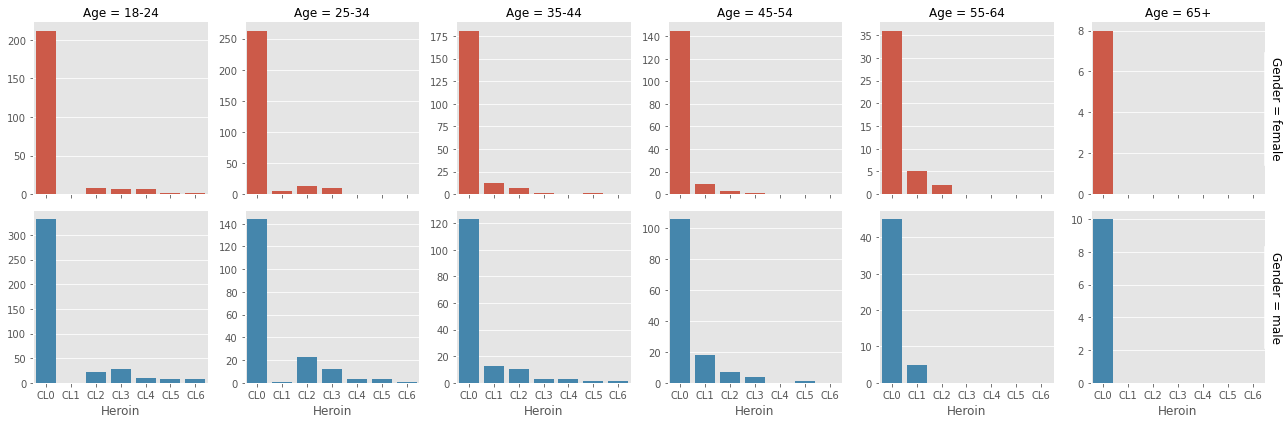

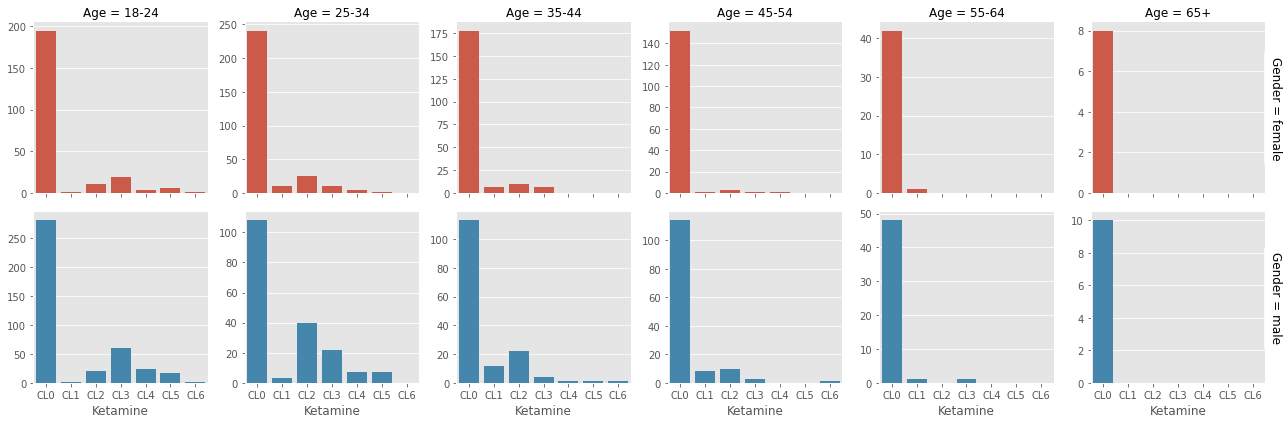

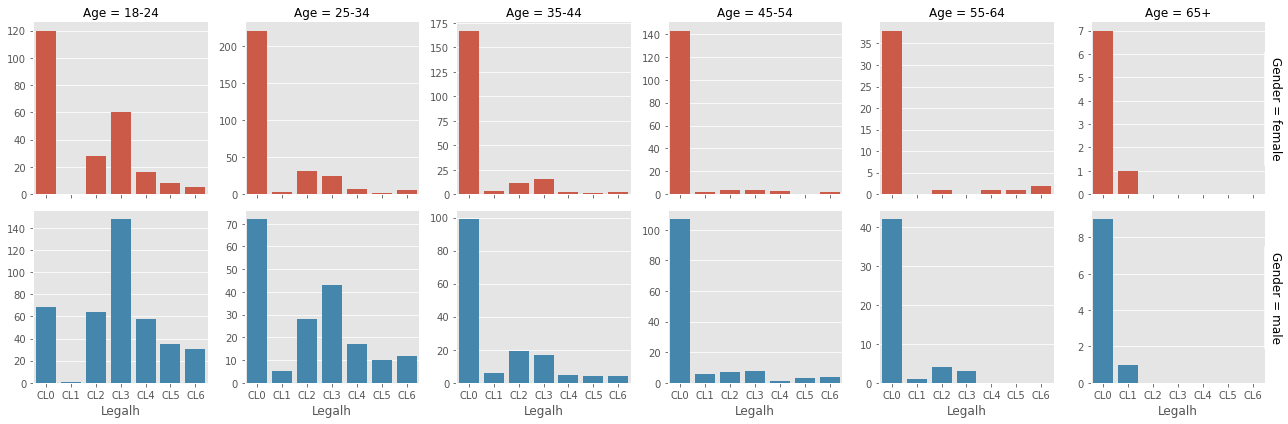

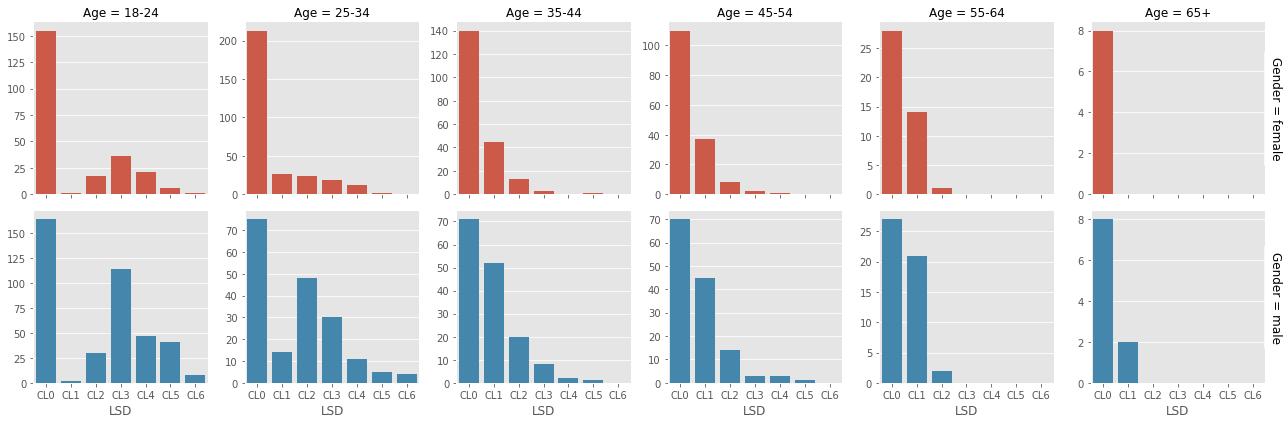

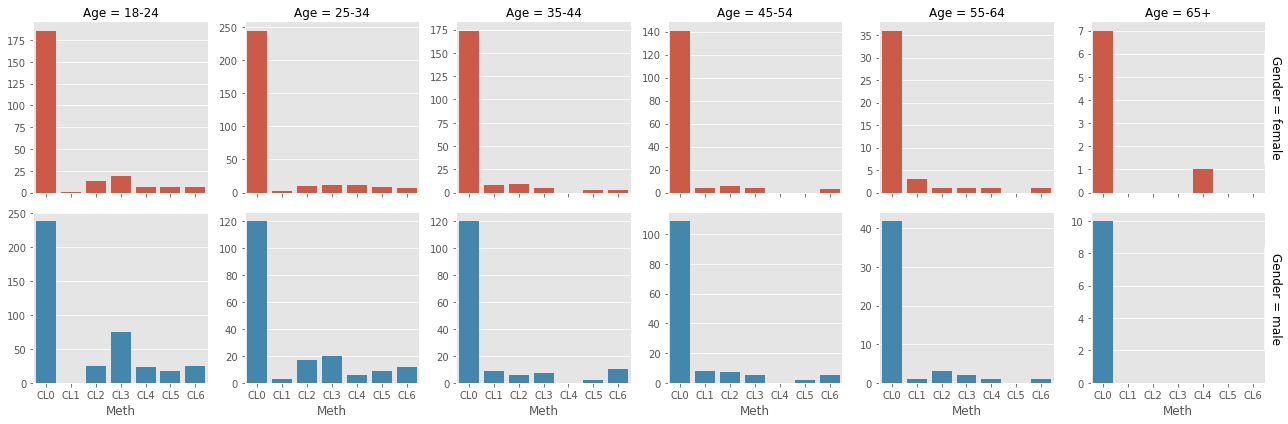

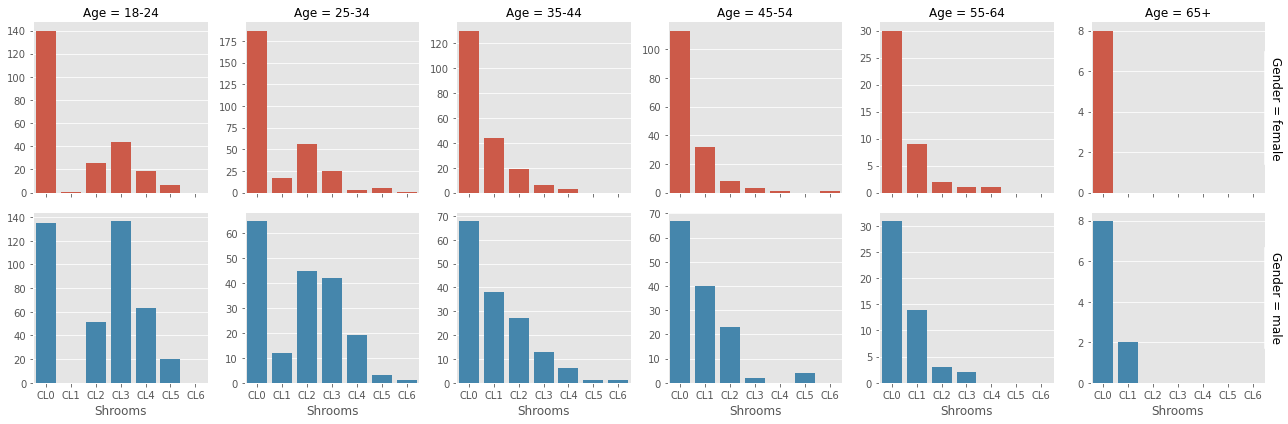

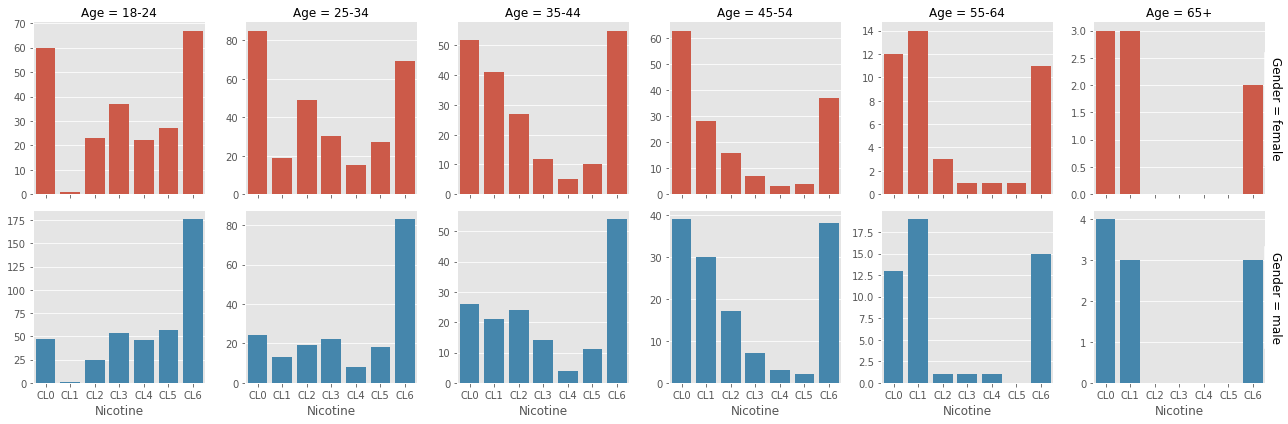

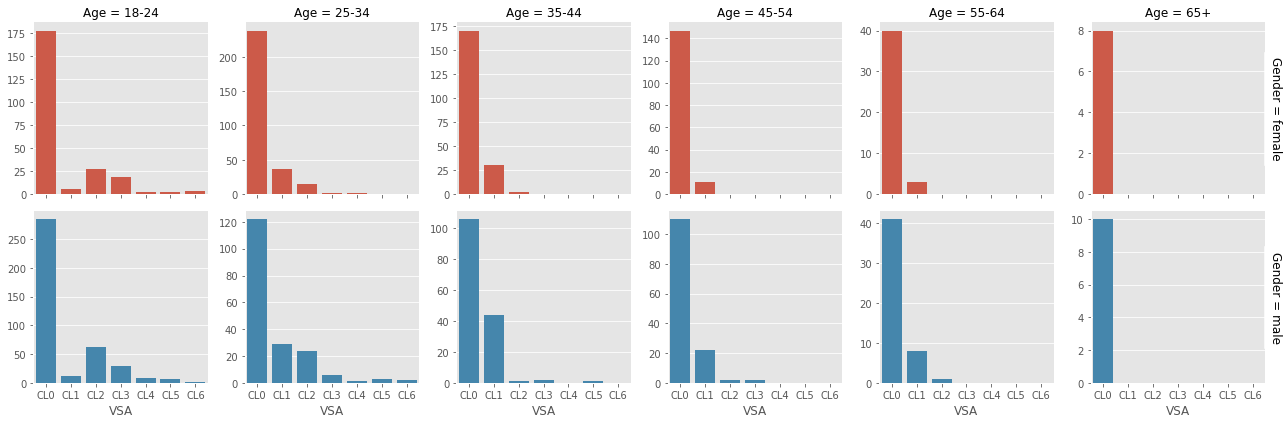

In [248]:
# check for Gender differences for drug use by age group

for drug in drugs:
    p = sns.FacetGrid(data_mod, col = 'Age',row = 'Gender', hue = 'Gender', sharey = False, col_order = age_order,margin_titles = True)
    p.map(sns.countplot, drug, order = order.index)
   

Throughout all age groups most people consumed Alcohol, Caffeine or Chocolate recently irespective of the gender.
Nicotine is also commenly used by all responders.  

Almost all illigal drugs were never consumed by most responders. Younger responders generally have a higher tendency of using these drugs. However, one should keep in mind, that more young people than old people responded. But amongst the older participants, more people than not stated that they have never in there life used these drugs.


### Education

In [262]:
data_mod['Education'].unique()

array(['prof certificate/diploma', 'doctorate', 'Master',
       'left school at 18', 'left school at 16', 'University degree',
       'uni wo degree', 'left school < 16', 'left school at 17'],
      dtype=object)

In [263]:
data_mod.replace({'Education':{data['Education'].unique()[0]:'prof certificate/diploma',data['Education'].unique()[1]:'doctorate',
                 data['Education'].unique()[2]: 'Master', data['Education'].unique()[3]:'left school at 18',
                 data['Education'].unique()[4]: 'left school at 16', data['Education'].unique()[5]:'University degree',
                 data['Education'].unique()[6]:'uni wo degree', data['Education'].unique()[7]:'left school < 16',
                 data['Education'].unique()[8]:'left school at 17'}}, inplace = True)

In [264]:
px.pie(data_mod, names = 'Education')

Most responders went to University but did not graduate or have at least a University degree (Bachelor?).

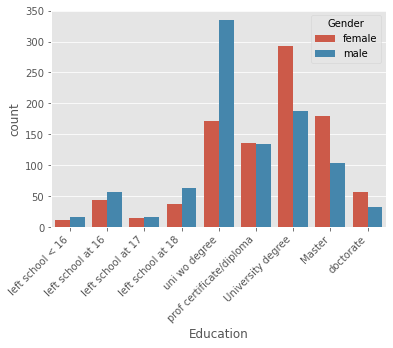

In [265]:
p = sns.countplot(x = 'Education', hue = 'Gender', data = data_mod,
              order = ['left school < 16','left school at 16','left school at 17','left school at 18','uni wo degree',
                       'prof certificate/diploma','University degree', 'Master', 'doctorate'])
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right');

### Country

In [266]:
data_mod.Country.unique()

array([ 0.96082,  0.24923, -0.57009, -0.28519, -0.09765,  0.21128,
       -0.46841])

In [267]:
data_mod.replace({'Country':{data['Country'].unique()[0]:'UK',data['Country'].unique()[1]:'Canada',
                 data['Country'].unique()[2]: 'USA', data['Country'].unique()[3]:'Other',
                 data['Country'].unique()[4]: 'Australia', data['Country'].unique()[5]:'Rep of Ireland',
                 data['Country'].unique()[6]:'New Zealand'}}, inplace = True)

In [268]:
px.pie(data_mod, names = 'Country')

Most responders have their current residence in the UK. 

### Ethnicity

In [269]:
data_mod.Ethnicity.unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [270]:
data_mod.replace({'Ethnicity':{data['Ethnicity'].unique()[0]:'White/Asian',data['Ethnicity'].unique()[1]:'White',
                 data['Ethnicity'].unique()[2]: 'other', data['Ethnicity'].unique()[3]:'White/Black',
                 data['Ethnicity'].unique()[4]: 'Asian', data['Ethnicity'].unique()[5]:'Black',
                 data['Ethnicity'].unique()[6]:'Black/Asian'}}, inplace = True)

In [271]:
px.pie(data_mod, names = 'Ethnicity')

Almost all responders are white. Needs to be checked whether the residencence is a usefull feature for prediction.

# Personality traits associated with drug use

In total the data set contains 7 differnet categories for each drug spanning different periods of usage ranging from never used to used last day. In terms of addiction there is a clear differnece between someone who has used a certain drug in the last decade and someone who has used the drug in the last month or more often. We therefore catagorize an "active drug user" as someone who has used a given drug in the last month or more often.
We can envision the following categories:  
  
never used: CL0, CL1 (we allow used over a decade ago)     
used rarely: CL2, CL3  
active user: CL4, CL5, CL6   

In [279]:
traits = [col for col in data.columns if 'score' in col] + ['SS', 'Impulsive']

In [273]:
user_criterion = ['CL4', 'CL5', 'CL6']
heroin_user = data_mod[data_mod['Heroin'].isin(user_criterion)]

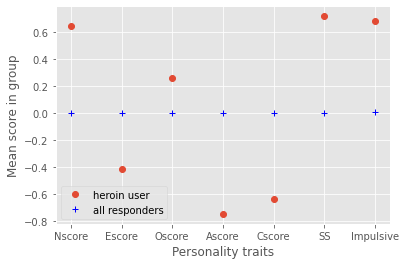

In [302]:
b = heroin_user[traits].mean()

c = data_mod[traits].mean()
plt.plot(traits, b, 'o', label = 'heroin user')
plt.plot(traits, c, 'b+', label ='all responders')
plt.xlabel('Personality traits')
plt.ylabel('Mean score in group')
plt.legend()


In [331]:
# get mean score for all personality scores after filtering for active users
# and get number of active users for each drug
active_user = []
active_user_mean = {}
for drug in drugs:
    user = data_mod[data_mod[drug].isin(user_criterion)]
    active_user.append((drug, user.shape[0]))
    active_user_mean[drug] = user[traits].mean()

# sort list of active_users according to number of users
active_user.sort(key = lambda x: x[1])


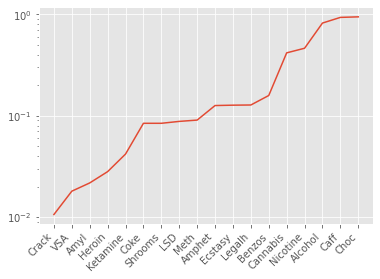

In [374]:
# plot normalized numbers of active users
active_drug = [drug for drug, number in active_user]
active_drug_count = [number/data_mod.shape[0] for drug, number in active_user]
plt.plot(active_drug, active_drug_count)
plt.yscale('log')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

Chocolate, caffeine, alcohol are the most consumed drugs. That is expected as these are the legal drugs. Canabis is the most used illegal drug. 

### Do personality traits differ for different drug users?

In [370]:
active_drug_mean_scores = [active_user_mean[drug] for drug in active_drug]

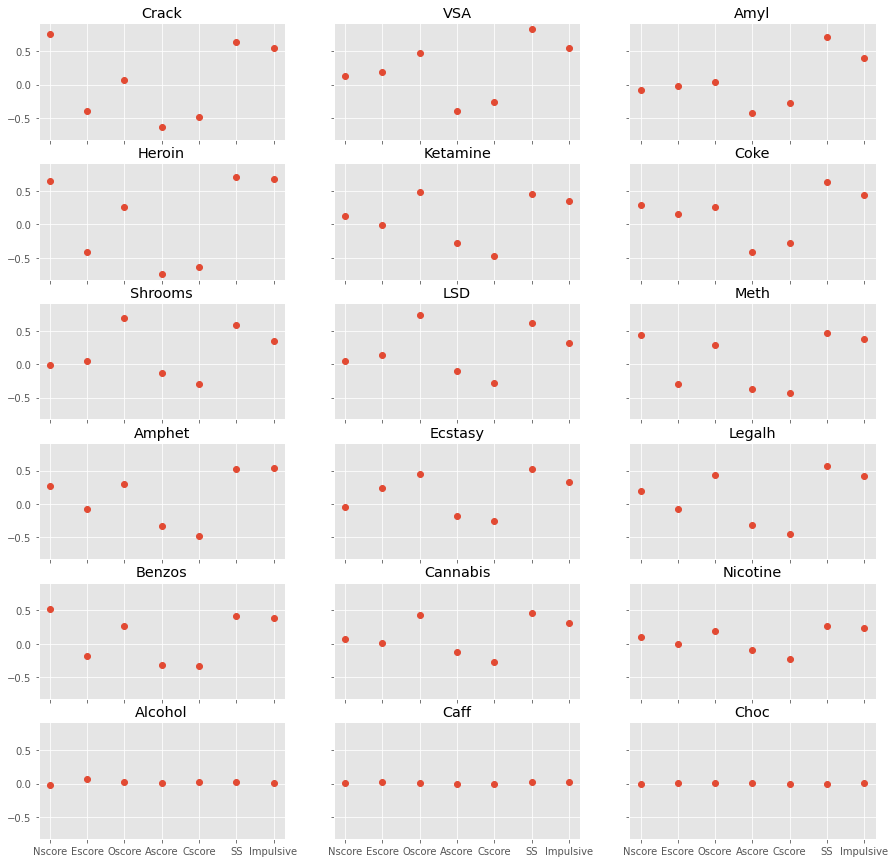

In [403]:
fig, axs = plt.subplots(6,3, sharex = True, sharey = True)
fig.set_figheight(15)
fig.set_figwidth(15)

j = 0
for i, drug in enumerate(active_drug):
    if j % 3 == 0:
        j = 0
        
    axs[i//3, j].plot(traits, active_user_mean[drug], 'o' )
    axs[i//3, j].set_title(f'{drug}')
    j+=1

__Note: Due to t-statistic transformation, the mean for the whole dataset is close to 0 for all scores__  
  
the personality traits from active alcohol, caffeine and chocolate users don't differ from those of the whole dataset. This was expected as the majority of people use these substances. For nicotine, the differences are only moderate.   
  
For most illelag drugs the mean score of at least one trait deviates by at least 0.5 units from the sample mean.



Text(0.5, 1.0, 'Mean scores of Personality traits for "Heroin" users')

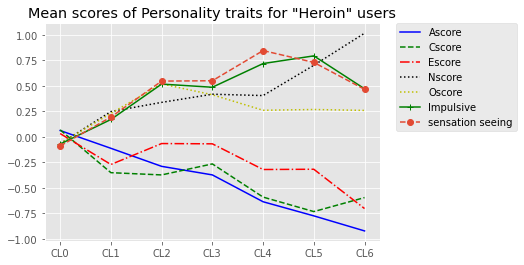

In [369]:
# get mean scores for heroin users
a = pd.pivot_table(data = data_mod, index = 'Heroin')

plt.plot(a.index, a.Ascore, 'b-', label = 'Ascore')
plt.plot(a.index, a.Cscore, 'g--', label = 'Cscore')
plt.plot(a.index, a.Escore, 'r-.', label = 'Escore')
plt.plot(a.index, a.Nscore, 'k:', label = 'Nscore')
plt.plot(a.index, a.Oscore, 'y:', label = 'Oscore')
plt.plot(a.index, a.Impulsive, 'g+-', label = 'Impulsive')
plt.plot(a.index, a.SS, 'o--', label = 'sensation seeing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mean scores of Personality traits for "Heroin" users')

__Should we only pick some drugs?__  
  
legal drugs?     
tranquilizer (benzos)?  
canabis  
club drugs (ecstasy, amphetmaine, ketamine)?  




Text(0.5, 1.0, 'Mean scores of Personality traits for "Alcohol" users')

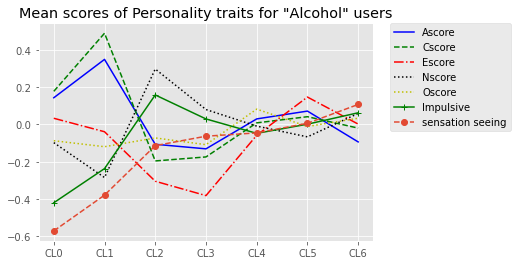

In [399]:
a = pd.pivot_table(data = data_mod, index = 'Alcohol')

plt.plot(a.index, a.Ascore, 'b-', label = 'Ascore')
plt.plot(a.index, a.Cscore, 'g--', label = 'Cscore')
plt.plot(a.index, a.Escore, 'r-.', label = 'Escore')
plt.plot(a.index, a.Nscore, 'k:', label = 'Nscore')
plt.plot(a.index, a.Oscore, 'y:', label = 'Oscore')
plt.plot(a.index, a.Impulsive, 'g+-', label = 'Impulsive')
plt.plot(a.index, a.SS, 'o--', label = 'sensation seeing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mean scores of Personality traits for "Alcohol" users')

Text(0.5, 1.0, 'Mean scores of Personality traits for "Choc" users')

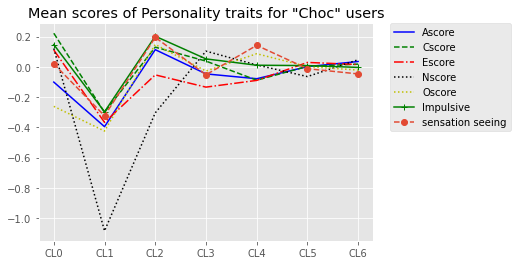

In [401]:
a = pd.pivot_table(data = data_mod, index = 'Choc')

plt.plot(a.index, a.Ascore, 'b-', label = 'Ascore')
plt.plot(a.index, a.Cscore, 'g--', label = 'Cscore')
plt.plot(a.index, a.Escore, 'r-.', label = 'Escore')
plt.plot(a.index, a.Nscore, 'k:', label = 'Nscore')
plt.plot(a.index, a.Oscore, 'y:', label = 'Oscore')
plt.plot(a.index, a.Impulsive, 'g+-', label = 'Impulsive')
plt.plot(a.index, a.SS, 'o--', label = 'sensation seeing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mean scores of Personality traits for "Choc" users')

Text(0.5, 1.0, 'Mean scores of Personality traits for "Ecstasy" users')

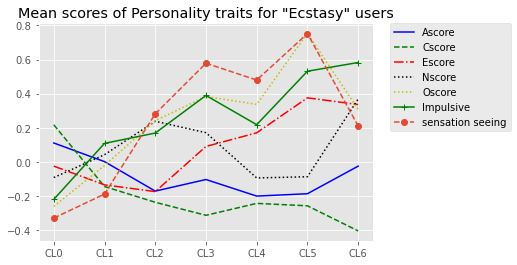

In [404]:
a = pd.pivot_table(data = data_mod, index = 'Ecstasy')

plt.plot(a.index, a.Ascore, 'b-', label = 'Ascore')
plt.plot(a.index, a.Cscore, 'g--', label = 'Cscore')
plt.plot(a.index, a.Escore, 'r-.', label = 'Escore')
plt.plot(a.index, a.Nscore, 'k:', label = 'Nscore')
plt.plot(a.index, a.Oscore, 'y:', label = 'Oscore')
plt.plot(a.index, a.Impulsive, 'g+-', label = 'Impulsive')
plt.plot(a.index, a.SS, 'o--', label = 'sensation seeing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mean scores of Personality traits for "Ecstasy" users')